In [1]:
#Param Vs Gen
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image

import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
def fetch_data(train_sz, test_sz):
    train_dataset = datasets.MNIST('data', train=True, download=False, 
                                   transform=transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.137,), (0.302,))
                                   ]))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_sz, shuffle=True)
    
    test_dataset = datasets.MNIST('data', train=False, download=False, 
                                  transform=transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.137,), (0.302,))
                                  ]))
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_sz, shuffle=True)
    
    return train_loader, test_loader

In [3]:
class NeuralNet_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 7)
        self.fc2 = nn.Linear(7, 11)
        self.fc3 = nn.Linear(11, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 28)
        self.fc2 = nn.Linear(28, 12)
        self.fc3 = nn.Linear(12, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 12)
        self.fc3 = nn.Linear(12, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 70)
        self.fc2 = nn.Linear(70, 14)
        self.fc3 = nn.Linear(14, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_5(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 90)
        self.fc2 = nn.Linear(90, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
class NeuralNet_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 110)
        self.fc2 = nn.Linear(110, 18)
        self.fc3 = nn.Linear(18, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 130)
        self.fc2 = nn.Linear(130, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_8(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 150)
        self.fc2 = nn.Linear(150, 22)
        self.fc3 = nn.Linear(22, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_9(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 170)
        self.fc2 = nn.Linear(170, 24)
        self.fc3 = nn.Linear(24, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class NeuralNet_10(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 190)
        self.fc2 = nn.Linear(190, 26)
        self.fc3 = nn.Linear(26, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
def model_params_info(model_name, model):
    num_params = sum(p.numel() for p in model.parameters())
    print(f'{model_name}: {num_params}')
    return num_params

In [6]:
batch_train = 50
batch_test = 100
train_loader, test_loader = fetch_data(batch_train, batch_test)

In [7]:
def setup_optimizer(model_instance):
    return optim.Adam(model_instance.parameters(), lr=0.0001)

In [8]:
def model_training(network, optimizer, data_loader):
    network.train()
    for idx, (inputs, labels) in enumerate(data_loader):
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()

        predictions = network(inputs.view(-1, 784))
        criterion = nn.CrossEntropyLoss()
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()

In [9]:
def compute_performance(network, loader):
    correct_preds = 0
    total_preds = 0
    total_loss = 0
    count_batches = 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for batch in loader:
            inputs, labels = batch
            outputs = network(inputs.view(-1, 784))
            loss = criterion(outputs, labels)
            total_loss += loss
            count_batches += 1
            for i, out_tensor in enumerate(outputs):
                if torch.argmax(out_tensor) == labels[i]:
                    correct_preds += 1
                total_preds += 1
                
    avg_loss = total_loss / count_batches
    accuracy = round(correct_preds / total_preds, 3)
    return avg_loss, accuracy

In [10]:
num_epochs = 8
param_list = []
train_loss_hist = []
test_loss_hist = []
train_acc_hist = []
test_acc_hist = []

# Refactored model training loop
def execute_training(network, optimizer, train_loader, test_loader):
    print('Starting training...')
    for epoch in range(1, num_epochs + 1):
        model_training(network, optimizer, train_loader)
    
    train_loss, train_accuracy = compute_performance(network, train_loader)
    test_loss, test_accuracy = compute_performance(network, test_loader)
    
    train_loss_hist.append(train_loss)
    test_loss_hist.append(test_loss)
    train_acc_hist.append(train_accuracy)
    test_acc_hist.append(test_accuracy)
    param_list.append(model_params_info('Model Parameters', network))
    
    print(f'Training finished with train loss: {train_loss}, test loss: {test_loss}')
    return train_loss, test_loss

In [11]:
train_losses = []
test_losses = []

In [12]:
network1 = NeuralNet_1()
optimizer = setup_optimizer(network1)
print('NeuralNet_1')
execute_training(network1, optimizer, train_loader, test_loader)

NeuralNet_1
Starting training...
Model Parameters: 5703
Training finished with train loss: 0.353801429271698, test loss: 0.34780365228652954


(tensor(0.3538), tensor(0.3478))

In [13]:
network2 = NeuralNet_2()
optimizer = setup_optimizer(network2)
print('NeuralNet_2')
execute_training(network2, optimizer, train_loader, test_loader)

NeuralNet_2
Starting training...
Model Parameters: 22458
Training finished with train loss: 0.2097829431295395, test loss: 0.21117980778217316


(tensor(0.2098), tensor(0.2112))

In [14]:
network3 = NeuralNet_3()
optimizer = setup_optimizer(network3)
print('NeuralNet_3')
execute_training(network3, optimizer, train_loader, test_loader)

NeuralNet_3
Starting training...
Model Parameters: 39992
Training finished with train loss: 0.17542429268360138, test loss: 0.18096378445625305


(tensor(0.1754), tensor(0.1810))

In [15]:
network4 = NeuralNet_4()
optimizer = setup_optimizer(network4)
print('NeuralNet_4')
execute_training(network4, optimizer, train_loader, test_loader)

NeuralNet_4
Starting training...
Model Parameters: 56094
Training finished with train loss: 0.15696175396442413, test loss: 0.16197223961353302


(tensor(0.1570), tensor(0.1620))

In [16]:
network5 = NeuralNet_5()
optimizer = setup_optimizer(network5)
print('NeuralNet_5')
execute_training(network5, optimizer, train_loader, test_loader)

NeuralNet_5
Starting training...
Model Parameters: 72276
Training finished with train loss: 0.13592210412025452, test loss: 0.14605380594730377


(tensor(0.1359), tensor(0.1461))

In [17]:
network6 = NeuralNet_6()
optimizer = setup_optimizer(network6)
print('NeuralNet_6')
execute_training(network6, optimizer, train_loader, test_loader)


NeuralNet_6
Starting training...
Model Parameters: 88538
Training finished with train loss: 0.12828680872917175, test loss: 0.14207369089126587


(tensor(0.1283), tensor(0.1421))

In [18]:
network7 = NeuralNet_7()
optimizer = setup_optimizer(network7)
print('NeuralNet_7')
execute_training(network7, optimizer, train_loader, test_loader)

NeuralNet_7
Starting training...
Model Parameters: 104880
Training finished with train loss: 0.11713073402643204, test loss: 0.1277497410774231


(tensor(0.1171), tensor(0.1277))

In [19]:
network8 = NeuralNet_8()
optimizer = setup_optimizer(network8)
print('NeuralNet_8')
execute_training(network8, optimizer, train_loader, test_loader)

NeuralNet_8
Starting training...
Model Parameters: 121302
Training finished with train loss: 0.10422670096158981, test loss: 0.1169322282075882


(tensor(0.1042), tensor(0.1169))

In [20]:
network9 = NeuralNet_9()
optimizer = setup_optimizer(network9)
print('NeuralNet_9')
execute_training(network9, optimizer, train_loader, test_loader)

NeuralNet_9
Starting training...
Model Parameters: 137804
Training finished with train loss: 0.0943545326590538, test loss: 0.11171266436576843


(tensor(0.0944), tensor(0.1117))

In [21]:
network10 = NeuralNet_10()
optimizer = setup_optimizer(network10)
print('NeuralNet_10')
execute_training(network10, optimizer, train_loader, test_loader)

NeuralNet_10
Starting training...
Model Parameters: 154386
Training finished with train loss: 0.0934167131781578, test loss: 0.1137903705239296


(tensor(0.0934), tensor(0.1138))

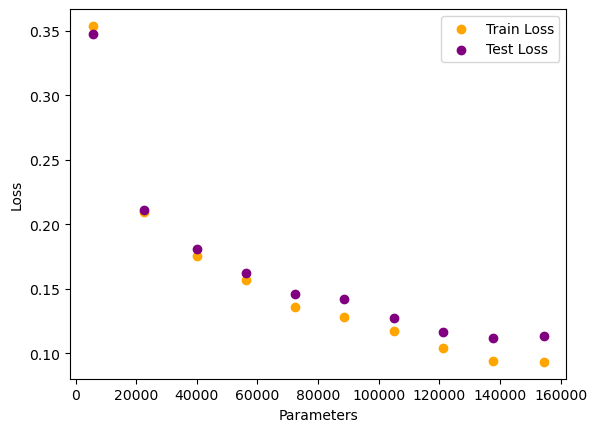

In [22]:
# Plotting the loss vs parameters with updated variable names
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.scatter(param_list, train_loss_hist, color="orange")
plt.scatter(param_list, test_loss_hist, color="purple")
plt.legend(['Train Loss', 'Test Loss'])
plt.show()


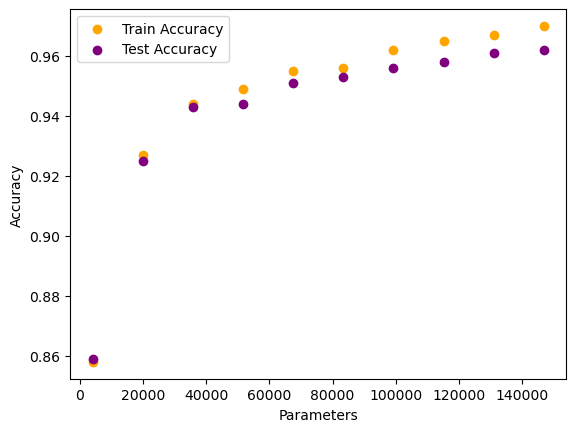

In [24]:
# Plotting the accuracy vs parameters with updated variable names
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.scatter(param_list, train_acc_hist, color="orange")
plt.scatter(param_list, test_acc_hist, color="purple")
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.show()